In [1]:
# Importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange, uniform
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# changing working directory
os.chdir("D:\Edwisor Data Science\Final Project 2 Submission")

In [3]:
# verifying directory
os.getcwd()

'D:\\Edwisor Data Science\\Final Project 2 Submission'

In [4]:
# importing the train dataset
df_train = pd.read_csv("train.csv")

In [5]:
# getting overview of data
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
# checking no of rows and columns
df_train.shape

(200000, 202)

In [5]:
# importing the test dataset
df_test = pd.read_csv("test.csv")

In [8]:
# getting overview of data
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [9]:
# checking no of rows and columns
df_test.shape

(200000, 201)

In [9]:
# checking variables datatypes 
print(df_train.dtypes)

ID_code      object
target     category
var_0       float64
var_1       float64
var_2       float64
             ...   
var_195     float64
var_196     float64
var_197     float64
var_198     float64
var_199     float64
Length: 202, dtype: object


In [7]:
#converting datatype of target variable
df_train['target'] = df_train['target'].astype('category')

In [8]:
# checking variables datatypes
print(df_test.dtypes)

ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object


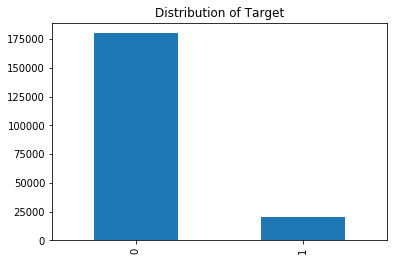

In [10]:
#checking data distribution in the target variable
df_train['target'].value_counts().plot(kind = 'bar', title = 'Distribution of Target')

#It is visible from below graph that data is not equalyy distributed

In [11]:
df_train['target'].value_counts()

#We can conclude that data is not uniformly distributed only 10% respondents are predicted as yes and 90% as no

0    179902
1     20098
Name: target, dtype: int64

In [12]:
#checking for missing values
missing_val = pd.DataFrame(df_train.isnull().sum())

#reshaping missing val dataframe
missing_val = missing_val.rename(columns = {'index' : 'Variable Names', 0 : 'Missing_Percent'})

#Calculating percentage
missing_val['Missing_Percent'] = (missing_val['Missing_Percent']) / len(df_train) * 100

#there is no missing values in our train data

In [16]:
#Checking correlation
corr = df_train.iloc[:,2:25].corr()

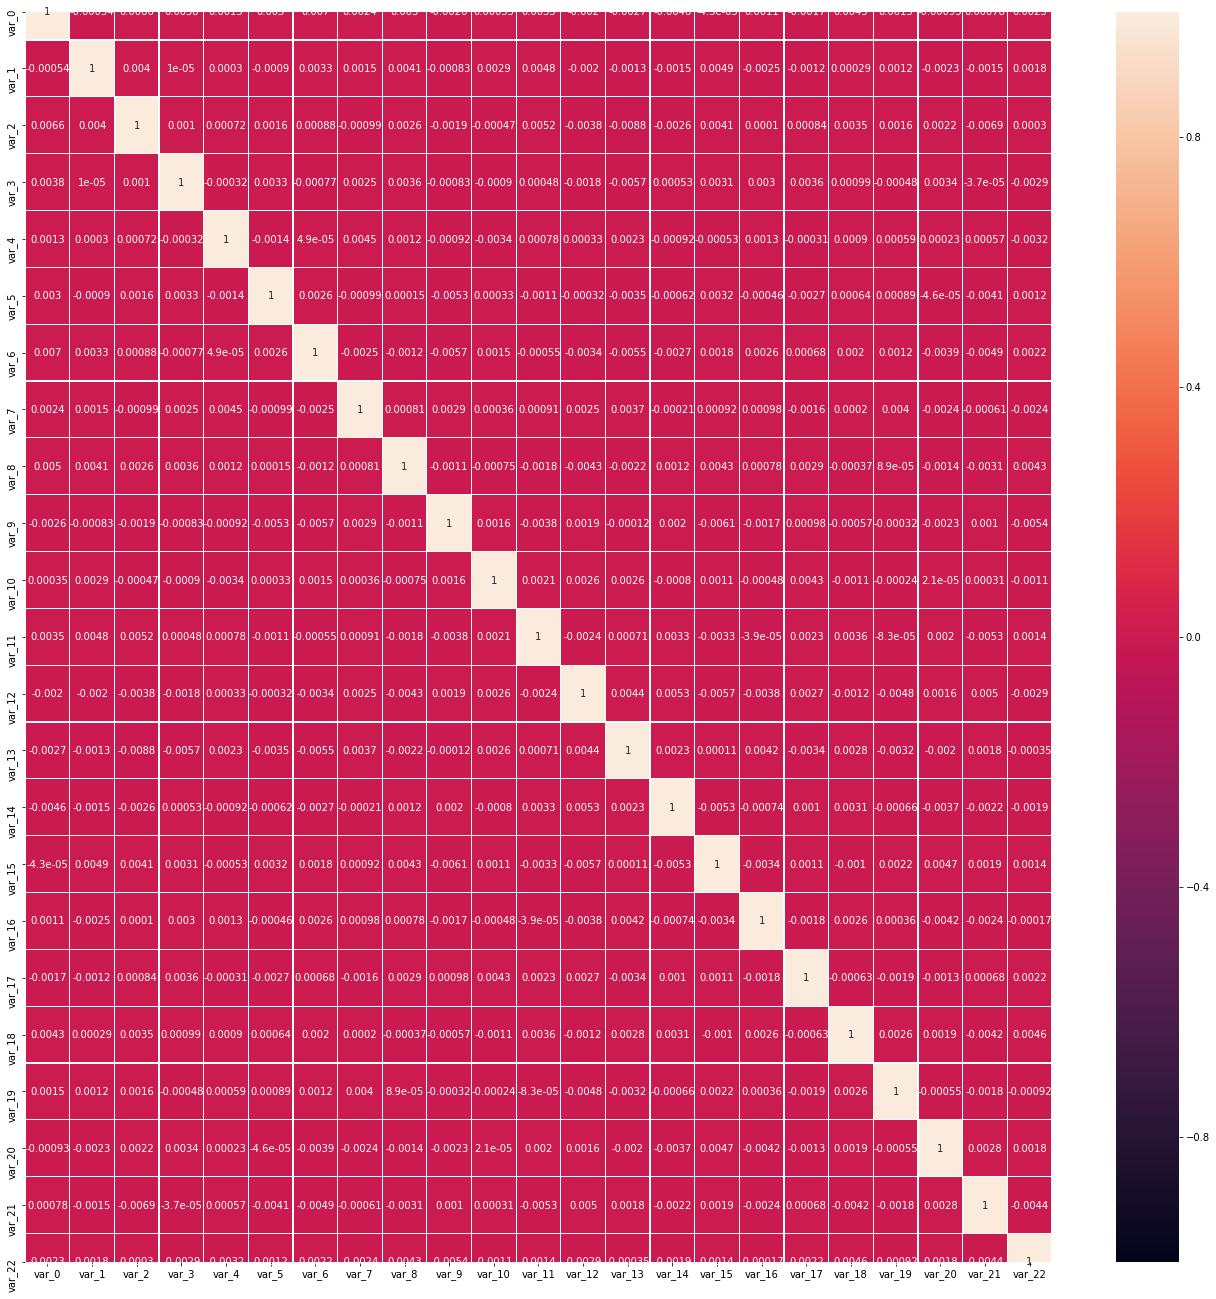

In [18]:
# Set the matplotlib figure 
fig, ax=plt.subplots(figsize=(23,23))
# Generate a custom diverging colormap
Cmap=sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap
Heatmap= sns.heatmap(corr,  ax=ax, annot=True,   vmin=-1, linewidths=0.2)

In [13]:
#Splitting the data
train_v1 = pd.DataFrame(df_train['target'])

In [14]:
train_v1 = train_v1.join(df_train.iloc[:,2:202])

In [16]:
temp = pd.get_dummies(df_train['target'], prefix = 'target')
train_v1 = train_v1.join(temp)

In [21]:
# Taking all customers with target value as 1
df_1 = train_v1.ix[(train_v1['target'] == 1)]

# Taking all customers with target value as 0
df_0 = train_v1.ix[(train_v1['target'] == 0)]

#Resetting index of dataframe df_0
df_0.reset_index()

#Considering equal no of 0 target value respondents
df_0_v1 = pd.DataFrame(df_0.iloc[0:20098,])

#Appending Data in 1 dataframe (df_1)
df_1 = df_1.append(df_0_v1)
print(df_1.shape)
print(df_0_v1.shape)

C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [49]:
#Checking Data frame observation counts
print(df_1.shape)
print(df_0_v1.shape)

(40196, 203)
(20098, 203)


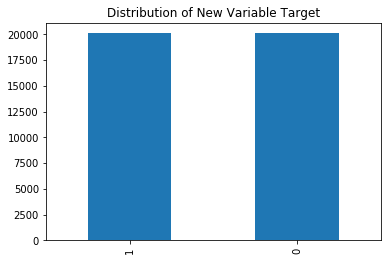

In [50]:
# Now ensuring our data is equally distributed
df_1['target'].value_counts().plot(kind = 'bar', title = 'Distribution of New Variable Target')

In [38]:
#Creating train and test datasets
Sample_Index = np.random.rand(len(train_v1)) < 0.8
training_set = train_v1[Sample_Index]
test_set = train_v1[~Sample_Index]

In [55]:
#Sampling to create small subset of data to check the data
#Stratified Sampling

y = df_1['target']

train, test = train_test_split(df_1, test_size = 0.2, stratify = y)

In [56]:
#Test shape
print(train.shape)

#Train shape
print(test.shape)

(32156, 203)
(8040, 203)


In [57]:
print(train['target'].value_counts())

print('-----------------------------------')

print(test['target'].value_counts())

1    16078
0    16078
Name: target, dtype: int64
-----------------------------------
1    4020
0    4020
Name: target, dtype: int64


# Logistic Regression

In [62]:
#Building Logistic Regression after seecting features whose p vlaue is less than 0.05
logit = sm.Logit(train['target'], train.iloc[:,1:201]).fit()

Optimization terminated successfully.
         Current function value: 0.463225
         Iterations 7


In [63]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                32156
Model:                          Logit   Df Residuals:                    31956
Method:                           MLE   Df Model:                          199
Date:                Tue, 04 Feb 2020   Pseudo R-squ.:                  0.3317
Time:                        20:04:17   Log-Likelihood:                -14895.
converged:                       True   LL-Null:                       -22289.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0476      0.005     10.420      0.000       0.039       0.057
var_1          0.0415      0.003     11.940      0.000       0.035       0.048
var_2          0.0643      0.005     12.200      0.0

In [64]:
test['target_pred'] = logit.predict(test.iloc[:,1:201])

C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
test['target_pred_val'] = 0
test.loc[test.target_pred > 0.5, 'target_pred_val'] = 1

In [67]:
test.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_194,var_195,var_196,var_197,var_198,var_199,target_0,target_1,target_pred,target_pred_val
16422,0,14.9177,-0.2666,8.9921,4.5191,9.3874,-17.0243,4.5398,16.3780,1.4438,...,16.9919,-2.0762,1.8559,10.4760,16.7520,4.2356,1,0,0.046856,1
12245,0,7.0294,-2.6624,8.2328,10.4294,8.5600,-19.9638,4.3387,15.5344,2.0158,...,21.4761,0.5088,1.5263,10.1527,16.9267,0.1044,1,0,0.178975,0
52156,1,11.3527,-1.9026,13.6351,8.0825,11.2354,-5.2345,4.4390,14.0338,4.7777,...,22.8938,0.5518,3.9624,7.7707,16.5964,-13.5587,0,1,0.190036,0
8136,0,10.2768,1.8165,8.4147,4.3961,11.3799,-6.4242,5.5100,20.2550,-5.6270,...,20.9280,-0.6058,7.7979,10.0143,14.8880,3.8760,1,0,0.347325,0
10468,0,9.5471,2.2888,10.4175,7.3407,11.3900,-5.7807,5.3760,23.5057,0.8068,...,19.3364,-0.6895,7.1302,9.6273,19.2936,4.3220,1,0,0.190811,0


In [83]:
#Build Confusion Matrix
CM_LR = pd.crosstab(test['target'], test['target_pred_val'])

In [84]:
CM_LR

target_pred_val,0,1
target,,
0,3091,929
1,849,3171


In [85]:
TP = CM_LR.iloc[1,1]
FP = CM_LR.iloc[0,1]
FN = CM_LR.iloc[1,0]
TN = CM_LR.iloc[0,0]

In [86]:
# Check accuracy of the model
((TP+TN)*100) / (TP+FP+FN+TN)

77.88557213930348

# Run 2 selecting values with p value lesser than 0.05

In [72]:
dnames = ('var_10','var_14','var_16','var_17','var_27','var_29','var_30','var_38','var_39','var_41','var_42','var_46','var_73',
          'var_79','var_96','var_98','var_100','var_103','var_117','var_124','var_126','var_129','var_136','var_153','var_158',
          'var_160','var_183','var_185')

In [32]:
#Creating train and test datasets
Sample_Index = np.random.rand(len(train_v1)) < 0.8
training_set_v2 = train_v1[Sample_Index]
test_set_v2 = train_v1[~Sample_Index]

In [33]:
training_set_v2.shape

(160054, 203)

In [74]:
test_backup = test.copy()
train_backup = train.copy()

In [77]:
# Dropping variables with P value greater than 0.05
for i in dnames:
    print(i)
    train = train.drop(i, axis = 1)
    
for i in dnames:
    print(i)
    test = test.drop(i, axis = 1)

var_10
var_14
var_16
var_17
var_27
var_29
var_30
var_38
var_39
var_41
var_42
var_46
var_73
var_79
var_96
var_98
var_100
var_103
var_117
var_124
var_126
var_129
var_136
var_153
var_158
var_160
var_183
var_185


In [78]:
print(train.shape)
print(test.shape)

(32156, 175)
(8040, 177)


In [80]:
#Re-Building Logistic Regression after seecting features whose p vlaue is less than 0.05
logit_v2 = sm.Logit(train['target'], train.iloc[:,1:173]).fit()

Optimization terminated successfully.
         Current function value: 0.463783
         Iterations 6


In [81]:
test['target_pred'] = logit_v2.predict(test.iloc[:,1:173])

In [87]:
test['target_pred_val'] = 0
test.loc[test.target_pred > 0.5, 'target_pred_val'] = 1

In [88]:
#Build Confusion Matrix
CM_v2 = pd.crosstab(test['target'], test['target_pred_val'])

In [89]:
CM_v2

target_pred_val,0,1
target,,
0,3091,929
1,849,3171


In [63]:
#test_set_v2.to_csv("LR_Output_26012020.csv", index = False)

In [90]:
TN_v21 = CM_v2.iloc[0,0]
TP_v21 = CM_v2.iloc[1,1]
FP_v21 = CM_v2.iloc[0,1]
FN_v21 = CM_v2.iloc[1,0]

In [91]:
print(TP_v21)
print(TN_v21)
print(FP_v21)
print(FN_v21)

3171
3091
929
849


In [92]:
# Check accuracy of the model
((TP_v21+TN_v21)*100) / (TP_v21+FP_v21+FN_v21+TN_v21)

77.88557213930348

In [93]:
#Import for ROC AUC Curve
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc

In [94]:
#ROC_AUC SCORE
roc_score=roc_auc_score(test['target'], test['target_pred_val'])
print('ROC Score Logistic Regression:',roc_score)

ROC Score Logistic Regression: 0.7788557213930348


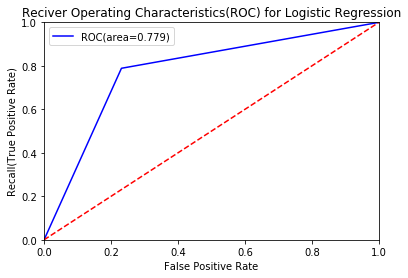

AUC: 0.7788557213930348


In [95]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(test['target'], test['target_pred_val'])
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Logistic Regression')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [96]:
#Classification report:-
classification_scores=classification_report(test['target'], test['target_pred_val'])
print(classification_scores)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      4020
           1       0.77      0.79      0.78      4020

    accuracy                           0.78      8040
   macro avg       0.78      0.78      0.78      8040
weighted avg       0.78      0.78      0.78      8040



* Generating Output file for TEST dataset using Logistic Regression

In [97]:
#Dropping variables from our Test dataset provided whose p value is greater than 0.05
for i in dnames:
    print(i)
    df_test = df_test.drop(i, axis = 1)

var_10
var_14
var_16
var_17
var_27
var_29
var_30
var_38
var_39
var_41
var_42
var_46
var_73
var_79
var_96
var_98
var_100
var_103
var_117
var_124
var_126
var_129
var_136
var_153
var_158
var_160
var_183
var_185


In [98]:
#checking shape of test dataset
df_test.shape

(200000, 173)

In [99]:
df_test['target_pred'] = logit_v2.predict(df_test.iloc[:,1:173])

In [100]:
df_test['target_predicted_value'] = 0
df_test.loc[df_test.target_pred > 0.5, 'target_predicted_value'] = 1

In [102]:
df_test['target_predicted_value'].value_counts()

0    144747
1     55253
Name: target_predicted_value, dtype: int64

In [103]:
#Selecting required columns for output file generation
LR_Output = df_test['ID_code']
LR_Output = pd.DataFrame(LR_Output)
LR_Output = LR_Output.join(df_test['target_pred'])
LR_Output = LR_Output.join(df_test['target_predicted_value'])

In [104]:
#Creating output file
LR_Output.to_csv("Logistic_Regression_Output_Python.csv", header = True, index = False)

# Random Forest Classifier Algorithm #

In [105]:
# Building Random Forest Model
RF_model = RandomForestClassifier(n_estimators = 100).fit(train.iloc[:,1:173], train['target'])

In [106]:
RF_Predictions = RF_model.predict(test.iloc[:,1:173])

In [107]:
#creating confusion matrix
CM_RF = pd.crosstab(test['target'], RF_Predictions)

In [108]:
CM_RF

col_0,0,1
target,,
0,2918,1102
1,937,3083


In [109]:
RF_Predictions_df = pd.DataFrame(RF_Predictions)
RF_Predictions_df.describe()

,0
count,8040.000000
mean,0.520522
std,0.499610
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [110]:
TN_RF = CM_RF.iloc[0,0]
TP_RF = CM_RF.iloc[1,1]
FP_RF = CM_RF.iloc[0,1]
FN_RF = CM_RF.iloc[1,0]

In [111]:
print('True Positive:', TP_RF)
print('True Negative:', TN_RF)
print('False Positive:', FP_RF)
print('False Negative:', FN_RF)

True Positive: 3083
True Negative: 2918
False Positive: 1102
False Negative: 937


In [112]:
# Check accuracy of the model
((TP_RF+TN_RF)*100) / (TP_RF+TN_RF+FP_RF+FN_RF)

74.63930348258707

In [113]:
#ROC_AUC SCORE FOR RANDOM FOREST
roc_score_rf=roc_auc_score(test['target'], RF_Predictions)
print('ROC Score Random Forest:',roc_score_rf)

ROC Score Random Forest: 0.7463930348258705


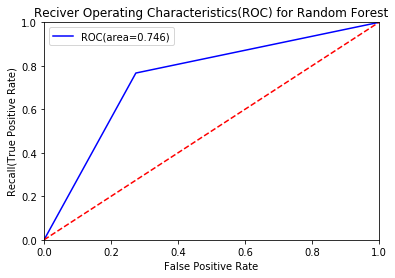

AUC_RF: 0.7463930348258705


In [114]:
#ROC_AUC_Curve for Random forest
plt.figure()
false_positive_rate_rf,recall_rf,thresholds_rf=roc_curve(test['target'], RF_Predictions)
roc_auc_rf=auc(false_positive_rate_rf,recall_rf)
plt.title('Reciver Operating Characteristics(ROC) for Random Forest')
plt.plot(false_positive_rate_rf,recall_rf,'b',label='ROC(area=%0.3f)' %roc_auc_rf)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC_RF:',roc_auc_rf)

In [115]:
#Classification report:-
classification_scores_rf=classification_report(test['target'], RF_Predictions)
print(classification_scores_rf)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      4020
           1       0.74      0.77      0.75      4020

    accuracy                           0.75      8040
   macro avg       0.75      0.75      0.75      8040
weighted avg       0.75      0.75      0.75      8040



* Generating Output file for TEST dataset using Random Forest

In [116]:
# Generating output for our test dataset provided
df_test['target_pred_RF'] = RF_model.predict(df_test.iloc[:,1:173])

In [117]:
df_test['target_pred_RF'].value_counts()

0    138025
1     61975
Name: target_pred_RF, dtype: int64

In [118]:
#Selecting required columns for output file generation
RF_Output = df_test['ID_code']
RF_Output = pd.DataFrame(RF_Output)
RF_Output = RF_Output.join(df_test['target_pred_RF'])

In [119]:
#Creating output file
RF_Output.to_csv("Random_Forest_Output_Python.csv", header = True, index = False)

# Naive Bayes Algorithm

In [121]:
from sklearn.naive_bayes import GaussianNB

In [123]:
#Running Naive Bayes Algorithm
NB_model = GaussianNB().fit(train.iloc[:,1:173],train['target'])

In [124]:
#Predicting test data
NB_predictions = NB_model.predict(test.iloc[:,1:173])

In [125]:
#Build Confusion Matrix
CM_NB = pd.crosstab(test['target'], NB_predictions)

In [126]:
CM_NB

col_0,0,1
target,,
0,3227,793
1,750,3270


In [127]:
TN_NB = CM_NB.iloc[0,0]
TP_NB = CM_NB.iloc[1,1]
FP_NB = CM_NB.iloc[0,1]
FN_NB = CM_NB.iloc[1,0]

In [128]:
print(TP_NB)
print(TN_NB)
print(FP_NB)
print(FN_NB)

3270
3227
793
750


In [129]:
# Check accuracy of the model
((TP_NB+TN_NB)*100) / (TP_NB+FP_NB+FN_NB+TN_NB)

80.80845771144278

In [130]:
#ROC_AUC SCORE
roc_score_nb = roc_auc_score(test['target'], NB_predictions)
print('ROC Score Naive Bayes:',roc_score_nb)

ROC Score Naive Bayes: 0.8080845771144279


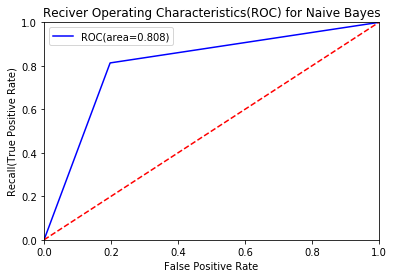

AUC: 0.8080845771144279


In [131]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate_nb,recall_nb,thresholds_nb=roc_curve(test['target'], NB_predictions)
roc_auc_nb=auc(false_positive_rate_nb,recall_nb)
plt.title('Reciver Operating Characteristics(ROC) for Naive Bayes')
plt.plot(false_positive_rate_nb,recall_nb,'b',label='ROC(area=%0.3f)' %roc_auc_nb)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc_nb)

In [132]:
#Classification report:-
classification_scores_nb=classification_report(test['target'], NB_predictions)
print(classification_scores_nb)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4020
           1       0.80      0.81      0.81      4020

    accuracy                           0.81      8040
   macro avg       0.81      0.81      0.81      8040
weighted avg       0.81      0.81      0.81      8040



* Generating Output file for TEST dataset using Naive Bayes

In [133]:
# Generatin output for our test dataset provided
df_test['target_pred_NB'] = NB_model.predict(df_test.iloc[:,1:173])

In [134]:
df_test['target_pred_NB'].value_counts()

0    150290
1     49710
Name: target_pred_NB, dtype: int64

In [135]:
#Selecting required columns for output file generation
NB_Output = df_test['ID_code']
NB_Output = pd.DataFrame(NB_Output)
NB_Output = NB_Output.join(df_test['target_pred_NB'])

In [136]:
#Creating output file
NB_Output.to_csv("Naive_Bayes_Output_Python.csv", header = True, index = False)